# Note: This code run on colab

<font color = green >
    
# Tensorflow

</font>

Writing and running programs in TensorFlow has the following steps:

1. Create Tensors (variables) 
2. Write operations between those Tensors
3. Initialize your Tensors 
4. Create a Session 
5. Run the Session

When you specify the operations needed for a computation,  tensorflow constructs a computation graph. 
<br>Finally, when you run the session, tensorflow executes the computation graph.

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
tf.__version__

'1.15.2'

### Import necessary packages

In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt

# from tensorflow.python.framework import ops

np.random.seed(1)

In [ ]:
# %matplotlib notebook
%matplotlib inline

<font color = green >
    
### Sample 1. Simple opertaions

</font>
 
$c= a x +b$, where  $a, x, b$ constants 

In [ ]:
tf.reset_default_graph()

# create all tensors 
a= tf.constant(3)
b= tf.constant(5)
x= tf.constant(4)
c = tf.add(tf.multiply(a,x), b)
print (c)

# run execution
session = tf.Session() 
print(session.run(c))
session.close()

Tensor("Add:0", shape=(), dtype=int32)
17


<font color = green >
    
### Sample 2. Placeholders

</font>
 
$c= a x +b$, where  $a,b$ constants, and $x$ - input parameter 

In [ ]:
a= tf.constant(3)
b= tf.constant(5)
x= tf.placeholder(tf.int32) # now it is placeholder

c = a*x +b # Note: most operations are overloaded to accept regular syntax

with tf.Session() as session: # better way to manage open session 
    print(session.run(c, feed_dict= {x: 4})) # need to feed the placegolder
    print(session.run(c, feed_dict= {x: 10}))



17
35


<font color = green >
    
### Sample 3. Variables

</font>
 


In [ ]:
a= tf.constant(3)
b= tf.constant(5)
x= tf.constant(1)

c = tf.Variable(a*x +b)  # Now it is variable 

with tf.Session() as session:
    init = tf.global_variables_initializer()  # Create initializer to use variables 
    session.run(init)   # Initialize the variables
    print(session.run(c))



8


<font color = green >
    
### Sample 4. Optimizer

</font>
 


In [ ]:
tf.reset_default_graph()
w= tf.Variable(0, dtype=tf.float32)
func = w**2 -6*w+ 9 
train = tf.train.GradientDescentOptimizer(0.01).minimize(func)

session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)
print(session.run(w))


0.0


In [ ]:
session.run(train)
print(session.run(w))

0.06


In [ ]:
for i in range(500):
    session.run(train)
    if i<10:
        print(session.run(w))    
        
print(session.run(w))        
session.close()

0.1188
0.176424
0.23289551
0.2882376
0.34247285
0.3956234
0.4477109
0.49875668
0.5487815
0.59780586
2.9998791


<font color = green >
    
### Sample 5. Optimizer with placeholders  

</font>
 


In [ ]:
def solve_equation(coef):
    
    coef_plhd = tf.placeholder(tf.float32,[1,3])
    w= tf.Variable(0, dtype=tf.float32)

    func = coef_plhd[0][0]* w **2 + coef_plhd[0][1]*w+ coef_plhd[0][2] 
    train = tf.train.GradientDescentOptimizer(0.01).minimize(func)
    init = tf.global_variables_initializer() # you may create initializer before running session
    
    with tf.Session() as session:
        session.run(init)
        for i in range(1000):
            session.run(train, feed_dict={coef_plhd: coef})
        res = session.run(w)

    return res 


coef = np.array([[1,-10,25]])               
solve_equation(coef)        

4.999988

<font color = green >
    
### Sample 6. Linear function

</font>

$Y = WX + b$, where $W$ is random matrix, b is a random vector


In [ ]:
def compute_linear(X):
    """
    X - input parameter of shape (?,1)
    Initializes W to be a random tensor of shape (4,?)
    Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result  Y = W @ X + b 
    """
    
    np.random.seed(1)
    
    X_plhd = tf.placeholder(tf.float64, [None,1]) # You may leave dimension free 
    W = tf.constant(np.random.randn(4,X.shape[0]))
    b = tf.constant(np.random.randn(4,1))
    Y = tf.matmul(W,X_plhd)   + b

    with tf.Session() as session:
        init = tf.global_variables_initializer() 
        session.run(init)       
        result = session.run(Y,  feed_dict =  {X_plhd:X})  
    
    return result

X=np.array([[1,2,3,4,5,6]]).T
compute_linear(X)

array([[-14.05689529],
       [ -5.55199868],
       [ -8.34096443],
       [  9.07203168]])

<font color = green >
    
###  Sample 7. Sigmoid function

</font>



In [ ]:
def sigmoid(z):    
    z_plhd = tf.placeholder(tf.float32)
    sigmoid = tf.sigmoid(z_plhd)

    with tf.Session() as session:                  
        result = session.run(sigmoid, feed_dict={z_plhd:z}) 
    
    return result

print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


<font color = green >
    
### Sample 8. Computing Cost 

</font>



In [ ]:
def compute_cost_demo(Z, Y):
    """
    Returns:
    cost - Tensor of the cost function
    """
    Z_plhd = tf.transpose(Z)  # sum over rows should be 1
    Y_plhd = tf.transpose(Y)

    # Note: tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=Y))
    # Default axis is -1 which is the last dimension.
    # each row of labels[i] must be a valid probability distribution
    # Make sure sum over rows = 1
    labels_sum = tf.reduce_sum(Y_plhd, axis=-1)

    cost_cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z_plhd, labels=Y_plhd))

    with tf.Session() as session:                  
        result = session.run(cost_cross_entropy, feed_dict={Z_plhd:Z, Y_plhd:Y}) 
        cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z_plhd, labels=Y_plhd)
        print (session.run(labels_sum , feed_dict={Z_plhd:Z, Y_plhd:Y}))
    return result 

logits = sigmoid(np.array([0.2,0.4,0.3,0.1]))
for i in range (4):    
    labels = np.zeros(4)
    labels[i] =1
    cost= compute_cost_demo(logits, labels)
    print (labels, "cost = " + str(cost))
    

1.0
[1. 0. 0. 0.] cost = 1.3988235
1.0
[0. 1. 0. 0.] cost = 1.3499699
1.0
[0. 0. 1. 0.] cost = 1.374215
1.0
[0. 0. 0. 1.] cost = 1.4236784


<font color = green >
    
## Linear neural network for handwritten digits

</font>
1- layer network with only linear tranformation

<font color = green >
    
### Load data 

</font>



In [ ]:
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# import tensorflow_datasets
# mnist = tensorflow_datasets.load('mnist')

mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# X_train = mnist.train.images  
# Y_train = np.asarray(mnist.train.labels, dtype=np.int32)
# X_test = mnist.test.images  
# Y_test = np.asarray(mnist.test.labels, dtype=np.int32)
# mnist

11493376/11490434 [==============================] - 0s 0us/step


<font color = green >
    
### Review dimensions

</font>



In [ ]:
print ('X_train.shape: ', X_train.shape)
print ('Y_train.shape: ', Y_train.shape)
print ('X_test.shape: ', X_test.shape)
print ('Y_test.shape: ', Y_test.shape)

X_train.shape:  (60000, 28, 28)
Y_train.shape:  (60000,)
X_test.shape:  (10000, 28, 28)
Y_test.shape:  (10000,)


In [ ]:
type(X_train), X_train[0].shape, X_train[0]

(numpy.ndarray,
 (28, 28),
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 

<font color = green >
    
### Review samples

</font>



In [ ]:

def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None:
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows):
        for j in range (n_cols):
            index = n_cols*i+j
            ax = plt.subplot(n_rows,n_cols,index+1)
            ax.imshow(X[indices[index]], cmap='Greys')
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')


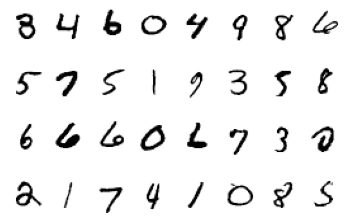

In [ ]:
plt.figure()

X_grid= X_train.reshape([-1, 28, 28])
display_samples_in_grid(X_grid, n_rows=4, n_cols=8)


### Reshape 

In [ ]:
# Note: w/o scaling the accuracy is 30-35% whereas with scaling it is over 90%
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)/255.0
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)/255.0

X_train_reshaped .shape, X_test_reshaped .shape


((60000, 784), (10000, 784))

In [ ]:
Y_train[0]

5

In [ ]:
tf.one_hot(Y_train, depth=10)

<tf.Tensor 'one_hot:0' shape=(60000, 10) dtype=float32>

In [ ]:
with tf.Session() as session:
    tf.global_variables_initializer().run()
    Y_train_oh= tf.one_hot(Y_train, depth=10).eval()
    Y_test_oh= tf.one_hot(Y_test, depth=10).eval()
Y_train_oh[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

<font color = green >

### Mini-batch implementation 

</font>

1. Shuffle samples 
2. Split to mini-batches 

<div style="clear:left;"></div>



In [ ]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    X - input data, of shape (number of examples, input size)
    Y - true "label" vector (1/0), of shape (number of examples,)
    mini_batch_size - size of the mini-batches, integer
    
    Returns:
    list o mini_batch_X, mini_batch_Y
    """    
    np.random.seed(seed)
    m = X.shape[0]                  # number of training examples
    mini_batches = []
        
    #  Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation]
    shuffled_Y = Y[permutation]

    # Split to complete mini batches
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[mini_batch_size * k : mini_batch_size * (k+1)]
        mini_batch_Y = shuffled_Y[mini_batch_size * k : mini_batch_size * (k+1)]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[m - (m//mini_batch_size) * mini_batch_size:]
        mini_batch_Y =  shuffled_Y[m - (m//mini_batch_size) * mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches


In [ ]:
mini_batches = random_mini_batches(X_train_reshaped, Y_train_oh)
type(mini_batches), type(mini_batches[0]), mini_batches[0][0].shape, mini_batches[0][1].shape

(list, tuple, (64, 784), (64, 10))

<font color = green >
    
### Build, train and evaluate model

</font>



In [ ]:

# create placeholders 
X_plhd = tf.placeholder(tf.float32, [None,784])
Y_plhd = tf.placeholder(tf.float32, [None,10]) # true label

# init params 
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

parameters= (W,b)

# forward_propagation
def forward_propagation(X, parameters):
    W,b = parameters
    return tf.nn.softmax(tf.matmul(X, W) + b)

Y_hat = forward_propagation(X_plhd, parameters) 

# cost_cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_hat), axis=1)) 
cost_cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Y_hat, labels=Y_plhd))

# setup optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cost_cross_entropy)

# create session
with tf.Session() as session:
    tf.global_variables_initializer().run()
    for mini_batch in mini_batches: 
        minibatch_X, minibatch_Y = mini_batch
        _, minibatch_cost = session.run([optimizer, cost_cross_entropy], feed_dict={X_plhd: minibatch_X, Y_plhd: minibatch_Y})
    
    # retreive trained parameters      
    parameters = session.run(parameters)

    # evaluate the model     
    correct_prediction = tf.equal(tf.argmax(Y_plhd, 1), tf.argmax(Y_hat, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    print("Train accuracy= ", accuracy.eval({X_plhd: X_train_reshaped, Y_plhd: Y_train_oh}))
    print("Test accuracy= ", accuracy.eval({X_plhd: X_test_reshaped, Y_plhd: Y_test_oh})) 


Train accuracy=  0.90003335
Test accuracy=  0.9058


<font color = green >
    
### Predict

</font>



In [ ]:
y_test_pred_oh = forward_propagation(X_plhd, parameters) # get prediction

with tf.Session() as session:
    y_test_pred_val = session.run(tf.argmax(y_test_pred_oh, 1),feed_dict={X_plhd: X_test_reshaped}) 


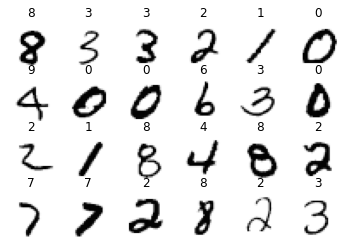

In [ ]:
plt.figure()
X_grid= X_test.reshape([-1, 28, 28])
display_samples_in_grid(X_grid, n_rows=4, n_cols=6, y=y_test_pred_val)


<font color = green >
    
### Compare implementations of cost_cross_entropy

</font>


Though the values of both computations are equal in this case the implementations are actually not the same.
``` python
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=labels))
```
computes the following way: 
``` python
alpha = tf.reduce_max(logits, axis=-1, keepdims=True)
log_sum_exp = tf.log(tf.reduce_sum(tf.exp(logits - alpha), axis=-1, keepdims=True)) + alpha
cross_entropy = -tf.reduce_sum((logits - log_sum_exp) * labels, axis=-1)
cost_cross_entropy = tf.reduce_mean(cross_entropy) 
```

More details:  [Streaming Log-sum-exp Computation](http://www.nowozin.net/sebastian/blog/streaming-log-sum-exp-computation.html)

In [ ]:
cost_cross_entropy_alt = tf.reduce_mean(-tf.reduce_sum(Y_plhd * tf.log(Y_hat), axis=1)) 
cost_cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Y_hat, labels=Y_plhd))

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    res = sess.run([cost_cross_entropy, cost_cross_entropy_alt], feed_dict={X_plhd: X_train_reshaped, Y_plhd: Y_train_oh})

res

[2.302599, 2.302599]

<font color = green >
    
## 3-layers neural network for signs (fingers)

</font>


<font color = green >
    
### Load data 

</font>



SIGNS Dataset
- **Training set**: 1080 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (180 pictures per number).
- **Test set**: 120 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (20 pictures per number).

Note that this is a subset of the SIGNS dataset. The complete dataset contains many more signs.



In [ ]:
import h5py # common package to interact with a dataset that is stored on an H5 file.
import os
import numpy as np 


In [ ]:
!wget https://www.dropbox.com/s/f33ym46utiwdvy4/train_signs.h5?dl=0 -O /content/sample_data/train_signs.h5
!wget https://www.dropbox.com/s/1doojr76evzroet/test_signs.h5?dl=0 -O /content/sample_data/test_signs.h5


--2021-09-19 11:15:07--  https://www.dropbox.com/s/f33ym46utiwdvy4/train_signs.h5?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/f33ym46utiwdvy4/train_signs.h5 [following]
--2021-09-19 11:15:07--  https://www.dropbox.com/s/raw/f33ym46utiwdvy4/train_signs.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9b77795cf8e89f045cd843fef7.dl.dropboxusercontent.com/cd/0/inline/BWe92ahHYbizZB9Yq84WvCvAh9kFnozf4tgLb08NrOX-27kOWLSuypp0TBx_kcehVB4Dm_Oi0ovZvByzBfj73o9UrhGLs5enYpaKFDiPK5-9yeDwb1bt5VEmoRQnq1m7CPaRd7Q7WNxmXg_VbPA8ytML/file# [following]
--2021-09-19 11:15:07--  https://uc9b77795cf8e89f045cd843fef7.dl.dropboxusercontent.com/cd/0/inline/BWe92ahHYbizZB9Yq84WvCvAh9kFnozf4tgLb08NrOX-27kOWLSuypp0TBx_kcehVB4Dm_Oi0ovZvBy

In [ ]:
# signs data set (fingers)
def load_dataset():
    fn =   '/content/sample_data/train_signs.h5'
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn ='/content/sample_data/test_signs.h5'
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    Y_test = Y_test.reshape((1, Y_test.shape[0]))
    
    return X_train, Y_train, X_test, Y_test, classes


<font color = green >
    
### Review dimensions

</font>



In [ ]:
train_data, train_labels, test_data, test_labels, classes = load_dataset()

print ('train_data.shape=', train_data.shape)
print ('train_labels.shape=',  train_labels.shape)
print ('test_data.shape=', test_data.shape)
print ('test_labels.shape=', test_labels.shape)

train_data.shape= (1080, 64, 64, 3)
train_labels.shape= (1, 1080)
test_data.shape= (120, 64, 64, 3)
test_labels.shape= (1, 120)


<font color = green >
    
### Review samples

</font>



/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


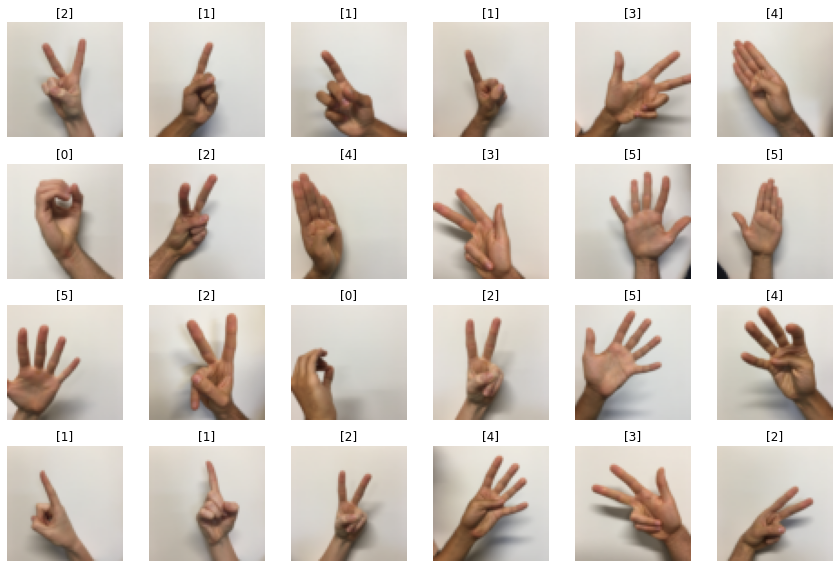

In [ ]:
plt.figure(figsize= (12,8))
display_samples_in_grid(train_data, n_rows=4, n_cols=6, y= train_labels.T)
plt.tight_layout(h_pad=1, w_pad=1)

<font color = green >
    
### Create placeholders

</font>



In [ ]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    n_x - scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y - scalar, number of classes (from 0 to 5, so -> 6)
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    """

    X = tf.placeholder(tf.float32, shape=[n_x,None], name= 'X') 
    Y = tf.placeholder(tf.float32, shape=[n_y,None], name= 'Y') 

    return X, Y

tf.reset_default_graph()
X, Y = create_placeholders(12288, 6)
X, Y

(<tf.Tensor 'X:0' shape=(12288, ?) dtype=float32>,
 <tf.Tensor 'Y:0' shape=(6, ?) dtype=float32>)

<font color = green >
    
### Reshape the data 

</font>



In [ ]:

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.ravel().reshape(-1)].T
    return Y

In [ ]:
# Flatten the data 
train_data_flatten = train_data.reshape(train_data.shape[0], -1).T
test_data_flatten = test_data.reshape(test_data.shape[0], -1).T

# Normalize image vectors
X_train = train_data_flatten/255.
X_test = test_data_flatten/255.

# Convert train and test labels to one hot matrices
Y_train = convert_to_one_hot(train_labels, 6)
Y_test = convert_to_one_hot(test_labels, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("\nX_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("\nX_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 1080
number of test examples = 120

X_train shape: (12288, 1080)
Y_train shape: (6, 1080)

X_test shape: (12288, 120)
Y_test shape: (6, 120)


<font color = green >
    
### Initialize parameters

</font>



In [ ]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    Returns:
    parameters - a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    tf.set_random_seed(1)

    W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())


    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

tf.reset_default_graph() # to create parameters if they created already 
parameters = initialize_parameters()
print("W1 = " , parameters["W1"])
print("b1 = ", parameters["b1"])
print("W2 = ", parameters["W2"])
print("b2 = " ,parameters["b2"])

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1 =  <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 =  <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 =  <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 =  <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


<font color = green >
    
### Forward propagation

</font>



In [ ]:
def forward_propagation(X, parameters):
    """
    Forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    Arguments:
    X - input placeholder, of shape (input size, number of examples)
    parameters - dictionary containing parameters "W1", "b1", "W2", "b2", "W3", "b3"
    Returns:
    Z3 - the output of the last LINEAR unit
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.matmul(W1,X) + b1
    A1 = tf.nn.relu(Z1)             
    Z2 = tf.matmul(W2,A1) + b2 
    A2 = tf.nn.relu(Z2)              
   
    Z3 = tf.add(tf.matmul(W3,A2) , b3, name = 'Z3') 
    
    return Z3

In [ ]:
tf.reset_default_graph()
X, Y = create_placeholders(12288, 6)
parameters = initialize_parameters()
Z3 = forward_propagation(X, parameters)
print("Z3 = " + str(Z3))

Z3 = Tensor("Z3:0", shape=(6, ?), dtype=float32)


<font color = green >
    
### Compute cost

</font>



In [ ]:

def compute_cost(Z, Y):
    """
    Computes the cost
    
    Arguments:
    Z - output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y - "true" labels vector placeholder, same shape as Z
    
    Returns:
    cost - Tensor of the cost function
    """
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits_v2
    Z_plhd = tf.transpose(Z)  # sum over rows should be 1
    Y_plhd = tf.transpose(Y)

    # Note: tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=Y))
    # Default axis is -1 which is the last dimension.
    # each row of labels[i] must be a valid probability distribution
    # Make sure sum over rows = 1
    labels_sum = tf.reduce_sum(Y_plhd, axis=-1) # you may evel it to make sure you provided proper shapes 

    cost_cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z_plhd, labels=Y_plhd))
    
    return cost_cross_entropy

In [ ]:
tf.reset_default_graph()
X, Y = create_placeholders(12288, 6)
parameters = initialize_parameters()
Z3 = forward_propagation(X, parameters)
cost = compute_cost(Z3, Y)
print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


<font color = green >
    
### Split to minibatches 

</font>



In [ ]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X - input data, of shape (input size, number of examples)
    Y - true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed - this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches - list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Split (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) 
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handle the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches


<font color = green >
    
### Build model

</font>



In [ ]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, verbose = True, save_model_path= None):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train - train set, of shape (input size = 12288, number of training examples = 1080)
    Y_train - train set one-hot , of shape (output size = 6, number of training examples = 1080)
    X_test - train set, of shape (input size = 12288, number of training examples = 120)
    Y_test - test set one-hot , of shape (output size = 6, number of test examples = 120)
    learning_rate - learning rate of the optimization
    num_epochs - number of epochs of the optimization loop
    minibatch_size - size of a minibatch
    print_cost - True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()  # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)  
    seed = 3               
    (n_x, m) = X_train.shape
    n_y = Y_train.shape[0]  
    costs = []              
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    
    # Initialize parameters
    parameters = initialize_parameters()

    # Forward propagation
    Z3 = forward_propagation(X, parameters)
    
        
    # Cost function
    cost = compute_cost(Z3, Y)

    # Define the tensorflow optimizer. 
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
    
    # Calculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"), name = 'Acc')

    
    # Initialize all the variables
    init = tf.global_variables_initializer()
    
    # create save to save the model    
    saver = tf.train.Saver()
    
    # Start the session to compute the tensorflow graph
    with tf.Session() as session:        
        session.run(init)

        for epoch in range(num_epochs):
            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch                
                _ , minibatch_cost = session.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if verbose == True and epoch % 100 == 0:
                print ("Cost after epoch {}: {} ".format(epoch, epoch_cost))
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.figure ()
        plt.show()

        # save the parameters in a variable or save the model 
        parameters = session.run(parameters)
        print ("\nParameters have been trained!")

        # save the model 
        saver.save(session, save_model_path )

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters
    

<font color = green >
    
### Run model training

</font>



Cost after epoch 0: 1.8555827140808105 
Cost after epoch 100: 1.646988637519605 
Cost after epoch 200: 1.5270597356738465 
Cost after epoch 300: 1.4373601819529678 
Cost after epoch 400: 1.3554978840278857 
Cost after epoch 500: 1.2805898297916762 
Cost after epoch 600: 1.2131026007912378 
Cost after epoch 700: 1.1523330283887456 
Cost after epoch 800: 1.0944620659857085 
Cost after epoch 900: 1.044278135805419 
Cost after epoch 1000: 0.9926710309404314 
Cost after epoch 1100: 0.9423703406796311 
Cost after epoch 1200: 0.8994354984977029 
Cost after epoch 1300: 0.8558883793426282 
Cost after epoch 1400: 0.8127861348065463 


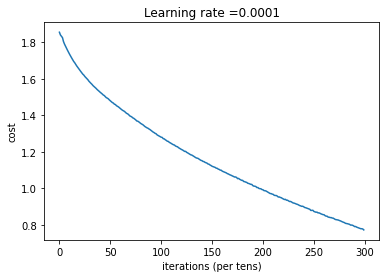

<Figure size 432x288 with 0 Axes>


Parameters have been trained!
Train Accuracy: 0.7888889
Test Accuracy: 0.69166666


In [ ]:
tf.reset_default_graph()
save_model_path =  '/content/sample_data/model_0.ckpt'
parameters = model(X_train, Y_train, X_test, Y_test, save_model_path= save_model_path)

<font color = green >
    
### Predict

</font>


In [ ]:
# This used the saved parameters, creates all necessary tensors and computation graph from scratch 
def predict(X, parameters):
    X_plhd = tf.placeholder("float", [12288, None]) # create the necessary placeholder
    Y_pred_oh = forward_propagation(X_plhd, parameters) # build computation graph 
    with tf.Session() as session:
        Y_pred_val = session.run(tf.argmax(Y_pred_oh), feed_dict = {X_plhd: X})
    return Y_pred_val


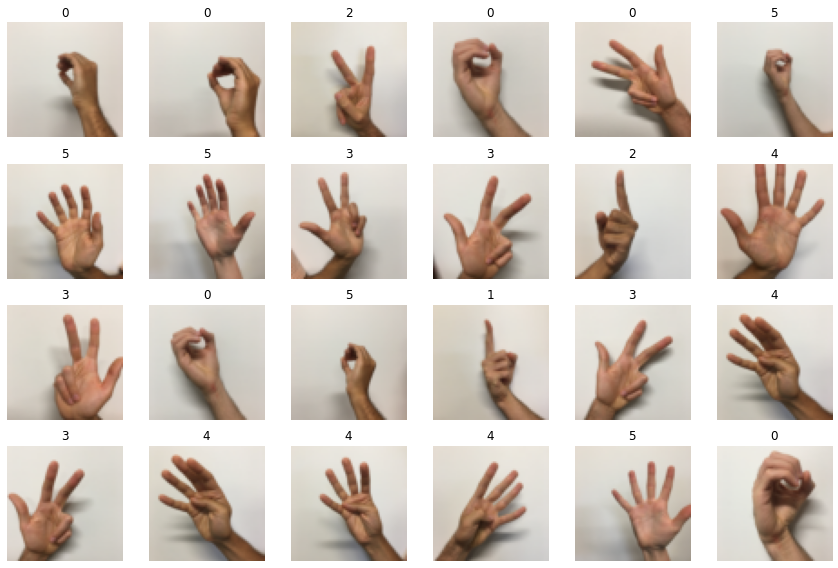

In [ ]:
plt.figure(figsize= (12,8))
Y_pred= predict(X_test, parameters)
display_samples_in_grid(test_data, n_rows=4, n_cols=6, y= Y_pred)
plt.tight_layout(h_pad=1, w_pad=1)

#### Predict custom image

In [ ]:
!wget https://www.dropbox.com/s/wzdrp1mtfa78jfw/2_fingers.jpg?dl=0 -O /content/sample_data/2_fingers.jpg

--2021-09-19 11:19:11--  https://www.dropbox.com/s/wzdrp1mtfa78jfw/2_fingers.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wzdrp1mtfa78jfw/2_fingers.jpg [following]
--2021-09-19 11:19:11--  https://www.dropbox.com/s/raw/wzdrp1mtfa78jfw/2_fingers.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf7711fe05798fe856fbf772a0d.dl.dropboxusercontent.com/cd/0/inline/BWevPBUukVenfstzGsf77oAqcvVr2V0VSliwBTKiuBNnVncgzTRnJEkmSw3R0q344NyBRZIDXGDaayBnoOFFA6QNAeQvC2kaZ_y91FpozJa9biNwvFSlmw24I7ap9sWLQiXVUhZNPj63A5tDUPbeHdEP/file# [following]
--2021-09-19 11:19:11--  https://ucf7711fe05798fe856fbf772a0d.dl.dropboxusercontent.com/cd/0/inline/BWevPBUukVenfstzGsf77oAqcvVr2V0VSliwBTKiuBNnVncgzTRnJEkmSw3R0q344NyBRZIDXGDaayBnoO

In [ ]:
from PIL import Image

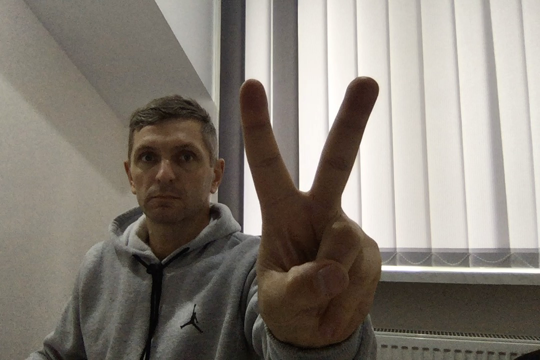

In [ ]:
fn=  '/content/sample_data/2_fingers.jpg'
image = Image.open(fn)
width, height = image.size 
ratio= .5
image.resize((int(width*ratio), int(height*ratio))) 


In [ ]:
image = Image.open(fn).resize((64,64))
print ('image.size= ', image.size)
my_image= np.array(image.getdata()).reshape((1, -1)).T
my_image.shape

image.size=  (64, 64)


(12288, 1)

In [ ]:
my_image_prediction = predict(my_image, parameters)
print("Your algorithm predicts: y = ",  np.squeeze(my_image_prediction))

Your algorithm predicts: y =  2


<font color = green >


## Save and restore model

</font>

There are few ways to save and restore trained model: 
<br>$\quad\quad$1) Restore all tensors and computation graph with the help of `import_meta_graph` and restore parameters from saved model (see below)
<br>$\quad\quad$2) Build all necessary tensors and computation graph from scratch, and restore parameters from saved model 
<br>$\quad\quad$3) build all necessary tensors and computation graph from scratch and use saved parameters of trained model (used above)


The following is process of saving model to restore it later with the help of `import_meta_graph`: 

```python 
parameters = initialize_parameters(...)
X, Y = create_placeholders(...)  # make sure to provide name for tensors  name='X', name='Y' 
Z = forward_propagation(X, parameters) #  make sure to provide name for tensor  name='Z'
cost = compute_cost(Z, Y)
correct_pred = tf.equal(tf.argmax(Z, -1), tf.argmax(Y, -1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name = 'Acc')

saver = tf.train.Saver()

# tf.add_to_collection('Z', Z) # Alternative approach if you did not name it at creating tensor 

init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    ...
    print("Optimization Finished!")
    save_path = saver.save(session, save_model_path)
```

Later, to restore the model: 

```python 
with tf.Session() as session:         
    save_graph_path =  save_model_path+ '.meta'
    saver = tf.train.import_meta_graph(save_model_path) # model_name.ckpt.meta'
    saver.restore(session, save_model_path)
    print("Model restored.")

    graph = tf.get_default_graph()
    X = graph.get_tensor_by_name("X:0") 
    Z = graph.get_tensor_by_name("Z:0") # or Z= tf.get_collection('Z')[0] if using add_to_collection
    Y = graph.get_tensor_by_name("Y:0")
    accuracy=  graph.get_tensor_by_name("Acc:0")

    # Use model
    Y_pred = session.run(tf.argmax(Z), feed_dict={X: X_to_predict})
    test_accuracy = accuracy.eval({X: X_test, Y: Y_test})

```
Without using `import_meta_graph` (option 2), you may build all necessary tensors and computation graph from scratch before restoring model:

```python
parameters = initialize_parameters(...)
X, Y = create_placeholders(...) 
Z = forward_propagation(X, parameters) 
cost = compute_cost(Z, Y)
correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"), name = 'Acc')

with tf.Session() as session:         
    saver.restore(session, save_model_path)
    print("Model restored.")
    
    # Use model
    Y_pred = session.run(tf.argmax(Z), feed_dict={X: X_to_predict})
    test_accuracy = accuracy.eval({X: X_test, Y: Y_test})

```
Finally (option 3) you may build all necessary tensors and computation graph from scratch and use saved parameters:

```python
X, Y = create_placeholders(...) 
Z = forward_propagation(X, parameters) 
cost = compute_cost(Z, Y)
correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"), name = 'Acc')
W = load_saved_parameters()

with tf.Session() as session:         
    # Use model
    Y_pred = session.run(tf.argmax(Z), feed_dict={X: X_to_predict})
    test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
```


INFO:tensorflow:Restoring parameters from /content/sample_data/model_0.ckpt
Model restored.
test_accuracy=  0.69166666


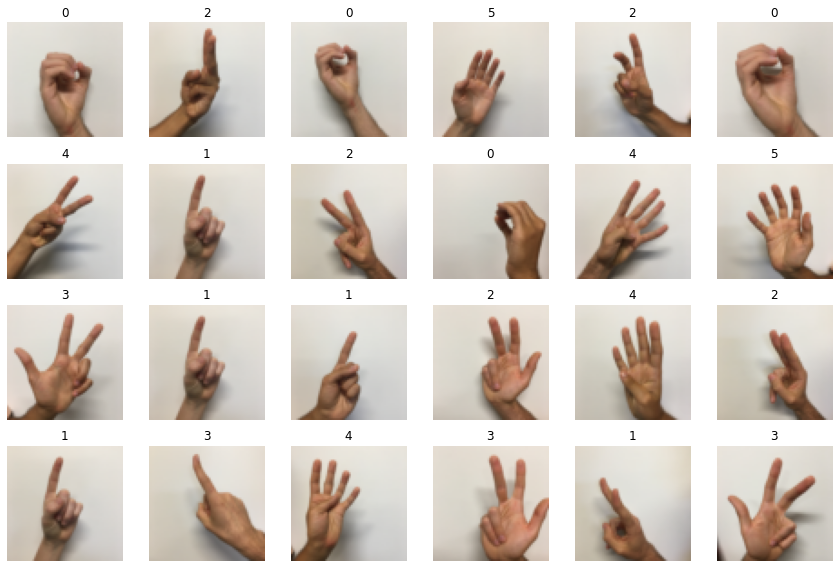

In [ ]:
# Use option 1 
with tf.Session() as session:         
    save_graph_path =  save_model_path + '.meta'
    saver = tf.train.import_meta_graph(save_graph_path)
    saver.restore(session, save_model_path)
    print("Model restored.")

    graph = tf.get_default_graph()
    X = graph.get_tensor_by_name("X:0") 
    Z3 = graph.get_tensor_by_name("Z3:0") 
    Y = graph.get_tensor_by_name("Y:0")
    accuracy=  graph.get_tensor_by_name("Acc:0")

    # Use model
    Y_pred = session.run(tf.argmax(Z3), feed_dict={X: X_test})
    test_accuracy = accuracy.eval({X: X_test, Y: Y_test})


print ('test_accuracy= ', test_accuracy)
plt.figure(figsize= (12,8))
Y_pred= predict(X_test, parameters)
display_samples_in_grid(test_data, n_rows=4, n_cols=6, y= Y_pred)
plt.tight_layout(h_pad=1, w_pad=1)


<font color = green >

## Learn more

</font>

[Module: tf](https://www.tensorflow.org/api_docs/python/tf)

[Tensorboard quick start in 5 minutes](https://medium.com/@anthony_sarkis/tensorboard-quick-start-in-5-minutes-e3ec69f673af)

[How to use TensorBoard with Google Colab](https://kuanhoong.medium.com/how-to-use-tensorboard-with-google-colab-43f7cf061fe4)




## Hometask

1) Upgrade the code to run in tensorflow<br>
2) Run tensorboard

